**<h1 > Weather</h1>**

***

**<h2 >Knock airport Weather</h2>**

![knock Airport](https://img.rasset.ie/0013f339-800.jpg)

###  Description of Assignment

***

Create a python file or notebook called assignment_6_Weather (.py or .ipynb)

Get the data from this link.

https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv


**Tasks**

Plot:

1. The temperature
1. The mean temperature each day
1. The mean temperature for each month
60% of the marks will be given for the above

For the last 40%

Plot:

1. The Windspeed (there is data missing from this column)
1. The rolling windspeed (say over 24 hours)
1. The max windspeed for each day
1. The monthly mean of the daily max windspeeds 



### Import the Libraries

***

We use [pandas](https://pandas.pydata.org/) for the DataFrame data structure. It allows us to investigate CSV files, amongst other features. 
Pandas is a software library written for the Python programming language, which is used for data manipulation and analysis.

We use [NumPy](https://numpy.org/), which is a library for the Python programming language, which allows us to work with large 
multi-dimensional arrays and matrices. It also supplies a large collection of high-level mathematical functions to operate on these arrays. 
[NumPy Wikipedia](https://en.wikipedia.org/wiki/NumPy)

We use [matplotlib](https://matplotlib.org/), which is a plotting library for the Python programming language, and is usually used in 
conjunction with its numerical mathematics extension NumPy.

We use [Seaborn](https://seaborn.pydata.org/) which is a library for making statistical graphics in Python. It builds on top of matplotlib and 
integrates closely with pandas 


In [1]:
#Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
from matplotlib.ticker import AutoMinorLocator
import pandas as pd
import seaborn as sns


### Load the dataset

***

 The first 23 rows of the dataset contained metadata, it was important to skip these rows when importing the dataset. The `skiprows=23` argument was passed to the `pd.read_csv()` function to achieve this goal. I also used the metadata in the first 23 rows to rename the columns of the dataset. This makes the datset clearer and easier to read. Initiall, I was using the `low_memory=False` argument to ensure that the data was read in as a single data type, but unfortunately this was not distinguishing between the `white space` characters contained within the dataset, and therfore this approach was abandoned. I choose to use the `skipinitialspace=True` argument instead, and the reasoning for this is explained below, when we are looking at the missing values in the dataset.

In [2]:
#Import the dataset

df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv', skiprows=23, skipinitialspace=True) 
#skiprows=23 is used to skip the first 23 rows of the dataset as they are just used for metadata
#low_memory=False is used to ensure that the data is read in as a single data type

#We need to rename the columns of the dataset as they are not properly named - use the metadata to do this
df.columns = ['Date/Time (utc)', 'Indicator', 'Precipitation Amount (mm)', 'Indicator', 'Temperature (°C)', 'Indicator', 'Wet Bulb Temperature (°C)', 'Dew Point Temp (°C)', 'Vapour Pressure (hPa)','Relative Humidity (%)', 'Mean Sea Level Pressure (hPa)','Indicator', 'Mean Wind Speed (knot)', 'Indicator', 'Predominant Wind Direction (deg)', 'Present Weather', 'Past Weather', 'Sunshine duration (hours)', 'Visibility', 'Cloud Height (ft * 100s)', 'Cloud amount']
df.head()


,Date/Time (utc),Indicator,Precipitation Amount (mm),Indicator,Temperature (°C),Indicator,Wet Bulb Temperature (°C),Dew Point Temp (°C),Vapour Pressure (hPa),Relative Humidity (%),...,Indicator,Mean Wind Speed (knot),Indicator,Predominant Wind Direction (deg),Present Weather,Past Weather,Sunshine duration (hours),Visibility,Cloud Height (ft * 100s),Cloud amount
0,10-apr-1996 14:00,0,0.0,0,11.5,0,8.1,3.9,0.0,0,...,0,0.0,0,0.0,25.0,81.0,0.0,35000.0,32.0,5.0
1,31-jul-1996 08:00,0,0.0,0,11.5,0,11.1,10.7,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,40000.0,45.0,5.0
2,31-jul-1996 09:00,0,0.0,0,11.6,0,10.7,9.8,0.0,0,...,0,0.0,0,0.0,80.0,81.0,0.0,8000.0,32.0,7.0
3,31-jul-1996 10:00,0,0.0,0,12.9,0,11.3,9.8,0.0,0,...,0,0.0,0,0.0,25.0,82.0,0.0,28000.0,35.0,6.0
4,31-jul-1996 11:00,0,0.0,0,14.5,0,10.8,7.0,0.0,0,...,0,0.0,0,0.0,2.0,11.0,0.0,40000.0,40.0,6.0


### Data Exploration
***

Check the datafram dimensionally with the `df.info` funtion.

In [ ]:
#Explore the dataset further, looking at the data types of each column, the number of non-null values and the memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247674 entries, 0 to 247673
Data columns (total 21 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Date/Time (utc)                   247674 non-null  object 
 1   Indicator                         247674 non-null  int64  
 2   Precipitation Amount (mm)         247625 non-null  float64
 3   Indicator                         247674 non-null  int64  
 4   Temperature (°C)                  247674 non-null  float64
 5   Indicator                         247674 non-null  int64  
 6   Wet Bulb Temperature (°C)         247674 non-null  float64
 7   Dew Point Temp (°C)               247674 non-null  float64
 8   Vapour Pressure (hPa)             247674 non-null  float64
 9   Relative Humidity (%)             247674 non-null  int64  
 10  Mean Sea Level Pressure (hPa)     247656 non-null  float64
 11  Indicator                         247674 non-null  i

### Dealing with missing values

***

After initally loading the dataset, when we first ran the `isna().sum()` functions, they indicated that the dataset contained no missing values. However, under inspection we could see that this was not true and that the dataset does in fact contain missing values. The cells were found to contain whitespace, which is why they did not register. Using the `skipinitialspace=True` argument removed the whitespaces that had being masking the hidden values in our dataset. We then got a true picture of the number of missing values in each column of the dataset as shown below.

While using tht `skipinitialspace=True` argument proved to be simple and effective, its not the only way we could have tackled this problem. We could have went down the route of using regular expressions. The regular expression given below would have also converted the whitespace characters in the dataset to NAN values.

```python
df.replace(r"^\s*$", np.nan, regex=True, inplace=True)
```

In [4]:
#Check for missing values. We can see that there is a lot of missing data in the dataset
df.isna().sum()

Date/Time (utc)                         0
Indicator                               0
Precipitation Amount (mm)              49
Indicator                               0
Temperature (°C)                        0
Indicator                               0
Wet Bulb Temperature (°C)               0
Dew Point Temp (°C)                     0
Vapour Pressure (hPa)                   0
Relative Humidity (%)                   0
Mean Sea Level Pressure (hPa)          18
Indicator                               0
Mean Wind Speed (knot)                 50
Indicator                               0
Predominant Wind Direction (deg)       52
Present Weather                     55079
Past Weather                        55080
Sunshine duration (hours)               0
Visibility                          62174
Cloud Height (ft * 100s)               18
Cloud amount                           18
dtype: int64

### Convert Date/Time (utc) column to datetime object

***

Before we convert the `Date/Time (utc)` column to a datetime object, the format of the strings needed to be noted (eg 01-apr-1996 14:00). In order to correctly convert this column to a datetime object we need to pass the `format='%d-%b-%Y %H:%M'` argument to the `pd.to_datetime()` function. After this was completed we could then perform time series analysis on the data in the dataset.

In [5]:
#Convert the Date/Time column to a datetime object.
#This will convert the date time from the current format to a datetime object which will allow us to perform time series analysis on the data
#The format parameter is used to specify the format of the date time in the dataset

df['Date/Time (utc)'] = pd.to_datetime(df['Date/Time (utc)'], format='%d-%b-%Y %H:%M')
print(df['Date/Time (utc)'])

0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
247669   2024-10-31 20:00:00
247670   2024-10-31 21:00:00
247671   2024-10-31 22:00:00
247672   2024-10-31 23:00:00
247673   2024-11-01 00:00:00
Name: Date/Time (utc), Length: 247674, dtype: datetime64[ns]


### Plot the Temperature

***

We have now got the dataset into a position where we can plot the temperature over time. We can see that the `Temperature (°C)` column contains zero missing values and we have converted the `Date/Time (utc)` column to a datetime object. We will also extract the date, without the time from this column below, to help make a better plot.

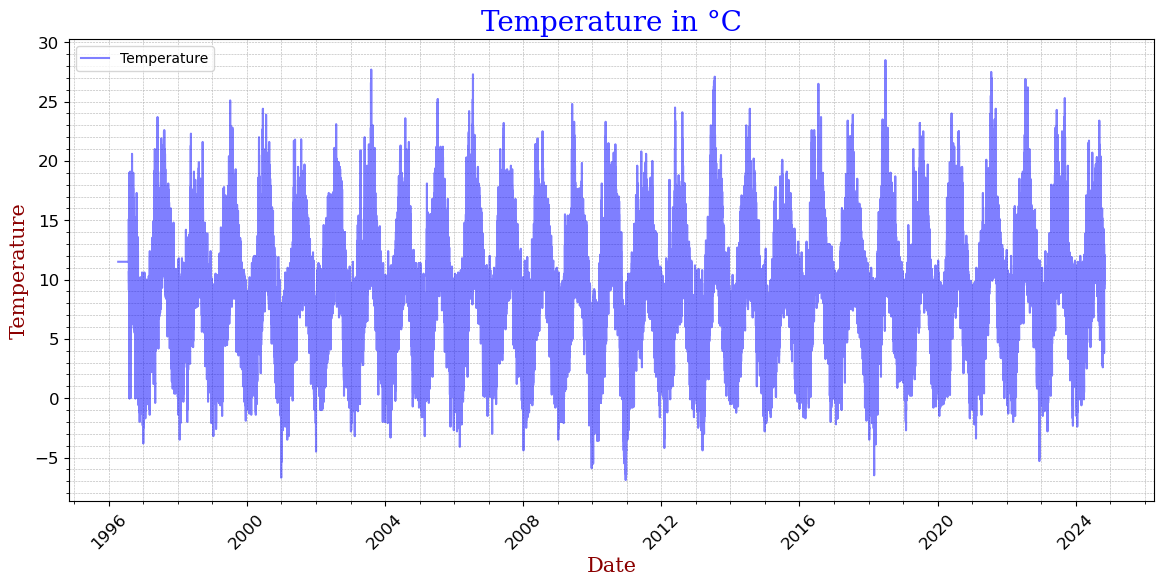

In [6]:
# Extract only the date (without time) for plotting
df['Date_only'] = df['Date/Time (utc)'].dt.date

#Plot the temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the date vs the temperature
ax.plot(df['Date_only'], df['Temperature (°C)'], color='blue', alpha=0.5)
#Set the title
ax.set_title('Temperature in °C', fontdict = font1)
#Set the x and y lables
ax.set_xlabel('Date' , fontdict = font2)
ax.set_ylabel('Temperature', fontdict = font2);
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)


#Add ticks to the plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)


#Add a legend
plt.legend(['Temperature'], loc='upper left')
ax.minorticks_on()

Obviously, with such a large amount of date being plotted, a good visualisation is not achieved. We can truncate the data based on time to achieve much clearer and cleaner plots. 
Lets have a look at this below.

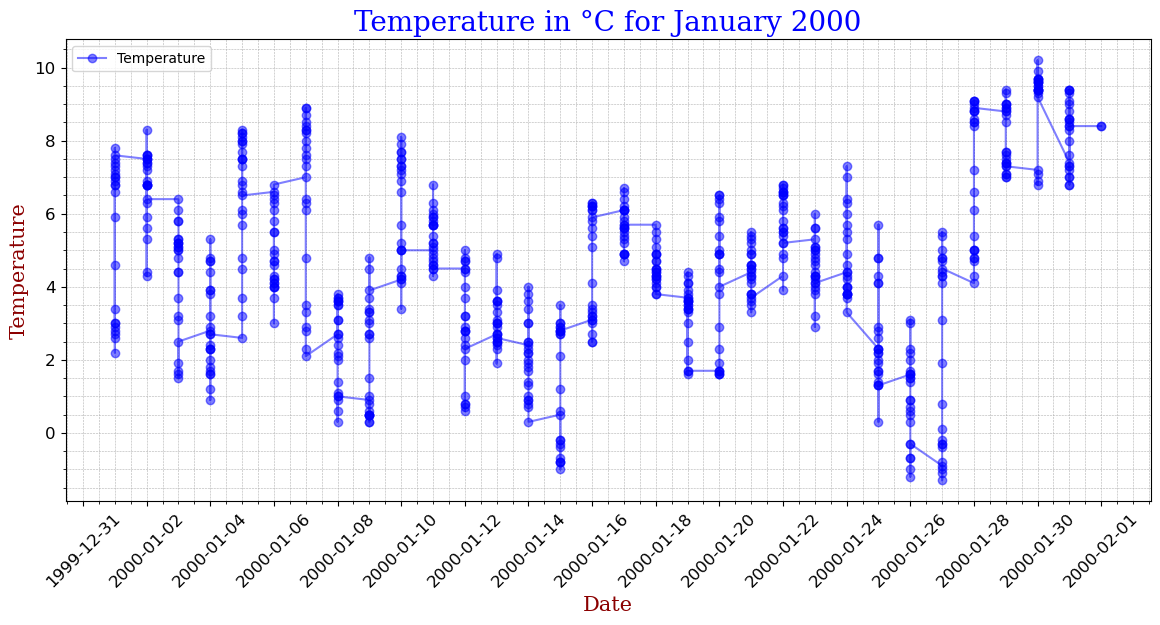

In [7]:
#Set the Date/Time column as the index of the dataframe. This will allow us to perform time series analysis on the data
df.set_index('Date/Time (utc)', inplace=True)

#Set the start and finish date
dateFrom = "2000-01-01 01:00:00"
dateTo = "2000-02-01 01:00:00"

#Truncate the data based on these dates
truncatedDF = df.loc[dateFrom:dateTo]

#Plot the temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the temperature vs time for this data
ax.plot(truncatedDF['Date_only'], truncatedDF['Temperature (°C)'], color='blue', alpha=0.5, marker="o")
#Set the title
ax.set_title('Temperature in °C for January 2000', fontdict = font1)
#Set the labels
ax.set_xlabel('Date' , fontdict = font2)
ax.set_ylabel('Temperature', fontdict = font2)

#Set up the x-axis so the major locators are every 2nd day and minor locators every day.
ax.xaxis.set_major_locator(mdate.DayLocator(interval=2))  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))  
ax.xaxis.set_minor_locator(mdate.DayLocator())


plt.legend(['Temperature'], loc='upper left')
#Plot a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
#Add ticks to the plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
ax.minorticks_on()



Better, but still not great. Maybe a seaborn lineplot will give us better results.

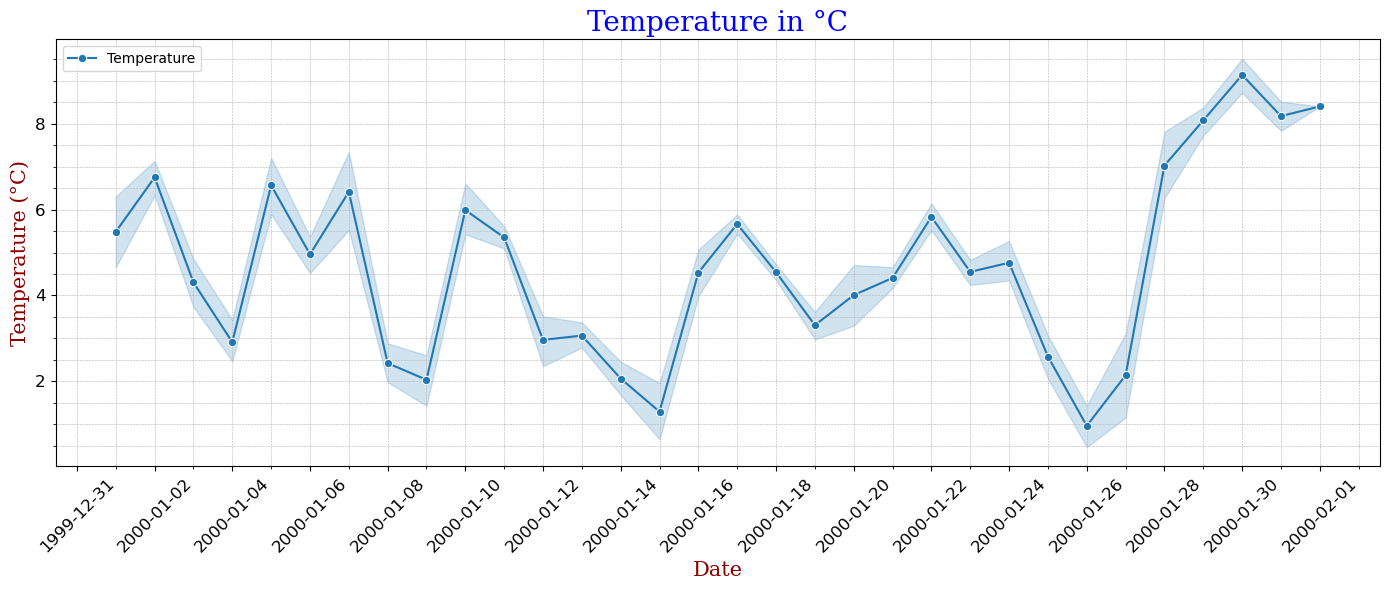

In [8]:
#Set up the plot size. Plot the temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title 
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the data using a seaborn lineplot
sns.lineplot(data=truncatedDF, x='Date_only', y='Temperature (°C)', marker='o')
#Set the title
plt.title('Temperature in °C', fontdict=font1)
plt.xlabel('Date', fontdict=font2)
plt.ylabel('Temperature (°C)', fontdict=font2)
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)


# Set the major locator to every second day
ax.xaxis.set_major_locator(mdate.DayLocator(interval=2))  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))  
ax.xaxis.set_minor_locator(mdate.DayLocator())

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

plt.legend(['Temperature'], loc='upper left')
# Adjust layout to fit labels
plt.tight_layout()
plt.show()

### The mean temperature each day

In [9]:
#Calculate the mean temperature for each day.
#We can use the resample method to calculate the mean temperature for each day
#The 'D' parameter is used to specify that we want to resample the data by day
meantemp_daily = df['Temperature (°C)'].resample('D').mean()

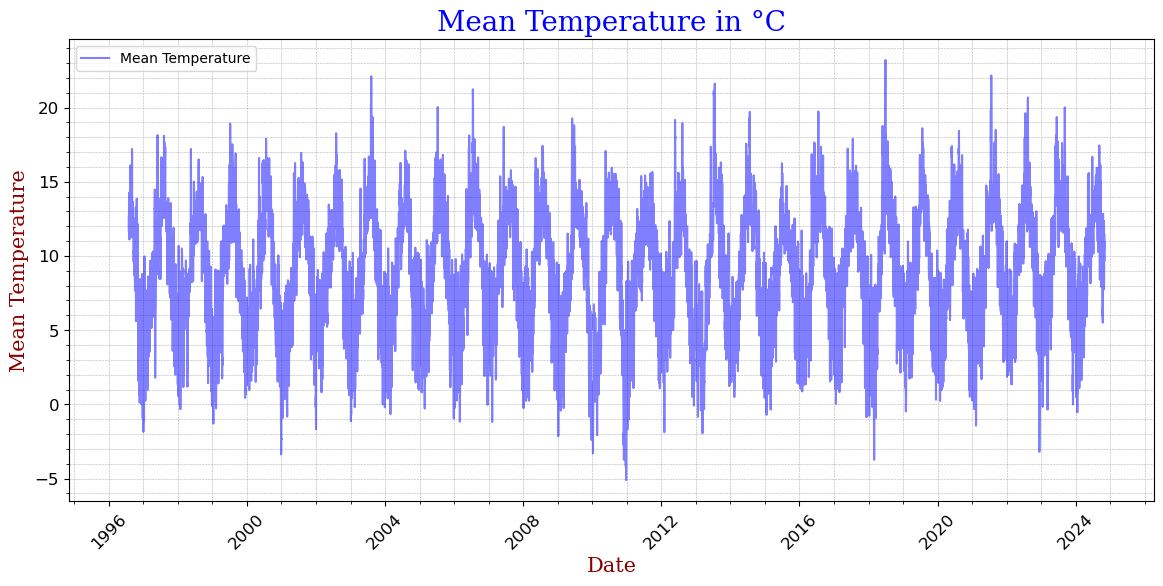

In [10]:
#Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the mean temperature
ax.plot(meantemp_daily.index, meantemp_daily, color='blue', alpha=0.5)
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
#Add a title
ax.set_title('Mean Temperature in °C', fontdict = font1)
#Add labels
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2)
#Add a legend
plt.legend(['Mean Temperature'], loc='upper left')

#Add ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
ax.minorticks_on()




Again, with a large amount of data in the dataset, this is not giving us the best visual plot. Lets look at truncating the data, as above for this plot also.

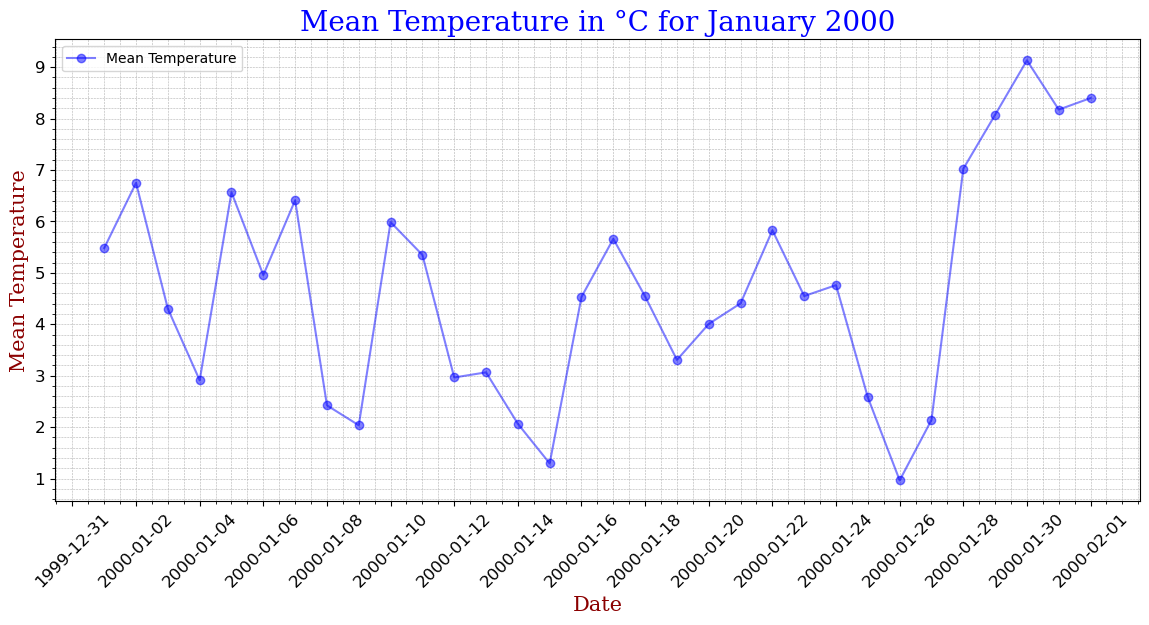

In [11]:
#Get the meantemp based on a daily resamplet of the dataset.
truncated_meantemp = truncatedDF['Temperature (°C)'].resample('D').mean()

##Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the mean temperature for January 2000
ax.plot(truncated_meantemp,  color='blue', alpha=0.5, marker='o')
#Add a title
ax.set_title('Mean Temperature in °C for January 2000', fontdict = font1)
#Add labels
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2)
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)

#Set the major locator to every 2nd day, minor locator to every day.
ax.xaxis.set_major_locator(mdate.DayLocator(interval=2))  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))  
ax.xaxis.set_minor_locator(mdate.DayLocator())

#Add a legend
plt.legend(['Mean Temperature'], loc='upper left')

#Add and customise your ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
ax.minorticks_on()

(array([-2.,  0.,  2.,  4.,  6.,  8., 10., 12., 14., 16., 18.]),
 [Text(0, -2.0, '−2'),
  Text(0, 0.0, '0'),
  Text(0, 2.0, '2'),
  Text(0, 4.0, '4'),
  Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18')])

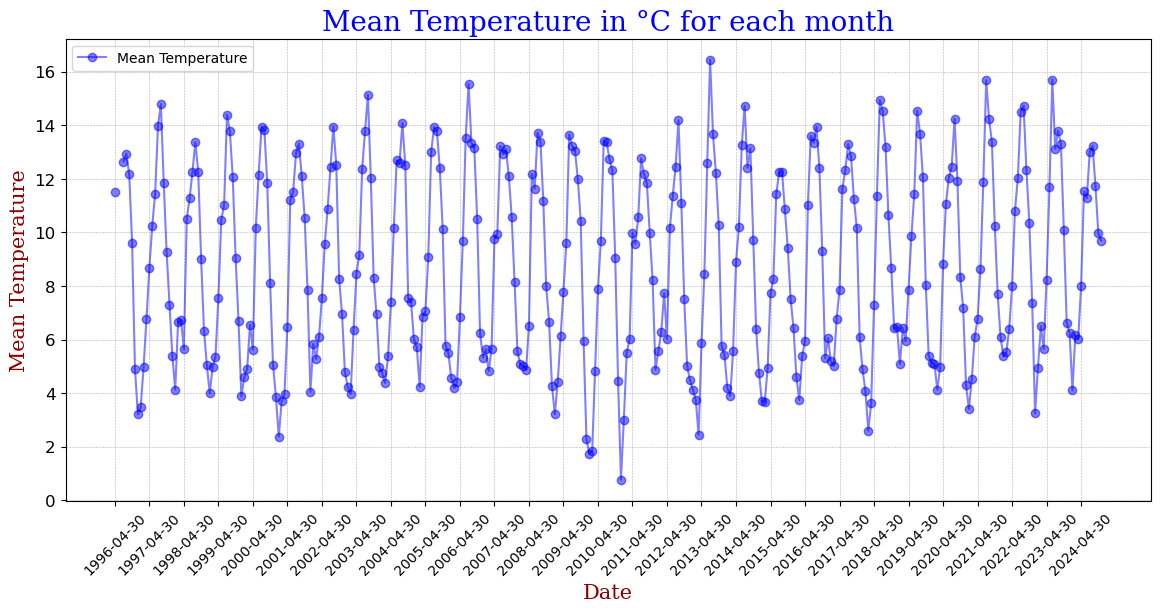

In [12]:
#Calculate the mean temperature for each month.
#We can use the resample method to calculate the mean temperature for each month
#The 'M' parameter is used to specify that we want to resample the data by month
meantemp_mounthly = df['Temperature (°C)'].resample('ME').mean()

#Plot the mean temperature data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the mean temperature data
ax.plot(meantemp_mounthly.index.astype(str), meantemp_mounthly, color='blue', marker='o', alpha=0.5)
#Add a title
ax.set_title('Mean Temperature in °C for each month', fontdict = font1)
#Add labels
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Temperature', fontdict = font2)
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)

#Add a legend
plt.legend(['Mean Temperature'], loc='upper left')

#Set the x-axis to show every 12 months
ax.set_xticks(ax.get_xticks()[::12])
plt.xticks(rotation=45)
plt.yticks(fontsize=12)




### Plot the Windspeed

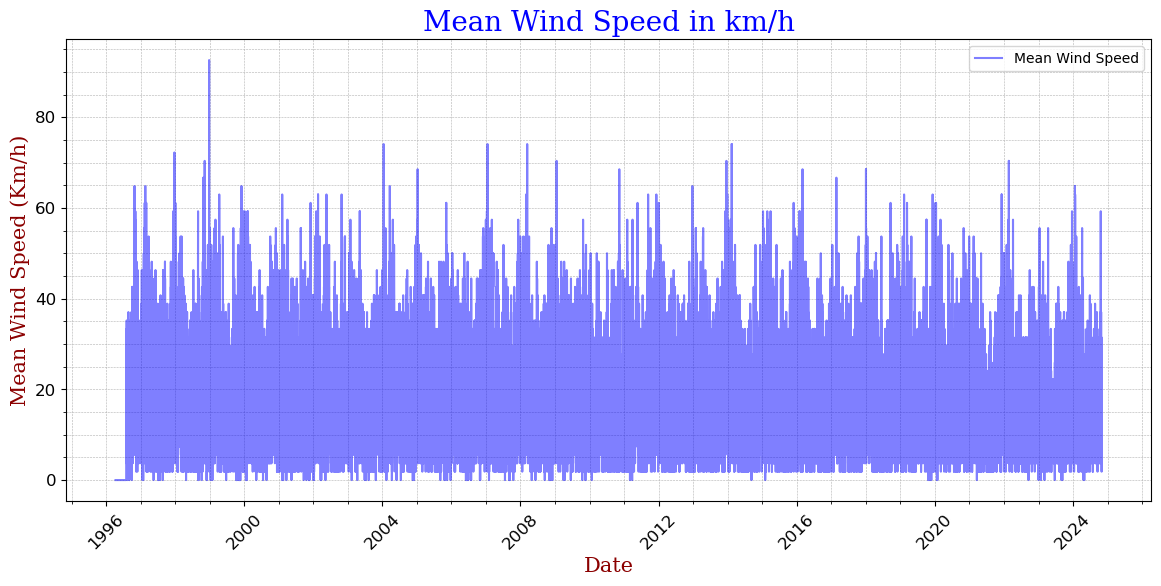

In [13]:
#The windspeed data is in knots. We can convert this to km/h by multiplying by 1.852
#Firstly though, we need to deal with the missing values in the dataset
#We can use the interpolate method to fill in the missing values
#The interpolate method uses linear interpolation to fill in the missing values
#We can then convert the windspeed data to km/h by multiplying by 1.852

df['Mean Wind Speed (knot)'] = df['Mean Wind Speed (knot)'].interpolate()

#Convert the windspeed data to km/h
df['Mean Wind Speed (km/h)'] = df['Mean Wind Speed (knot)'] * 1.852


#Plot the windspeed data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Plot the mean wind speed in km/h
ax.plot(df['Date_only'], df['Mean Wind Speed (km/h)'], color='blue', alpha=0.5)
#Set the title
ax.set_title('Mean Wind Speed in km/h', fontdict = font1)
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)

#Add a legend
plt.legend(['Mean Wind Speed'], loc='upper right')

#Add lables 
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Mean Wind Speed (Km/h)', fontdict = font2)
#Add ticks
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
ax.minorticks_on()


A similar issue can be seen above. In order to get a satisfactory plot it is necessary to truncate the data based on time. We will have a look at this below.

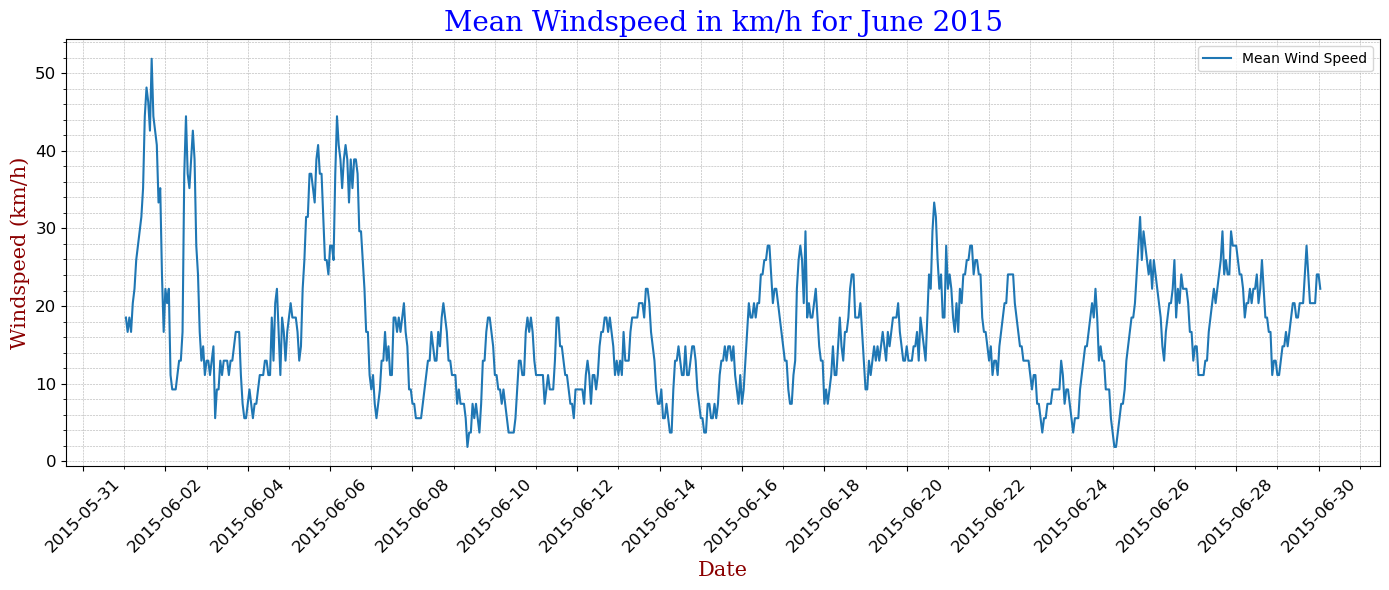

In [14]:

# Filter data for a specific period of time
startDate = "2015-06-01 01:00:00"
endDate = "2015-06-30 01:00:00"
filteredDf = df.loc[startDate:endDate]

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Plot with Seaborn
fig, ax = plt.subplots(figsize=(14, 6))

#Plot a seaborn lineplot of the data
sns.lineplot(data=filteredDf, x=filteredDf.index, y="Mean Wind Speed (km/h)")
#Add a title
plt.title('Mean Windspeed in km/h for June 2015', fontdict=font1)
#Add labels
plt.xlabel('Date', fontdict=font2)
plt.ylabel('Windspeed (km/h)', fontdict=font2)
#Add a legend
plt.legend(['Mean Wind Speed'], loc='upper right')

#Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

#Set your major and minor locators for x-axis
ax.xaxis.set_major_locator(mdate.DayLocator(interval=2))  
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d'))  
ax.xaxis.set_minor_locator(mdate.DayLocator())
#Add ticks to plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add minor ticks on y-axis 
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()
plt.show()




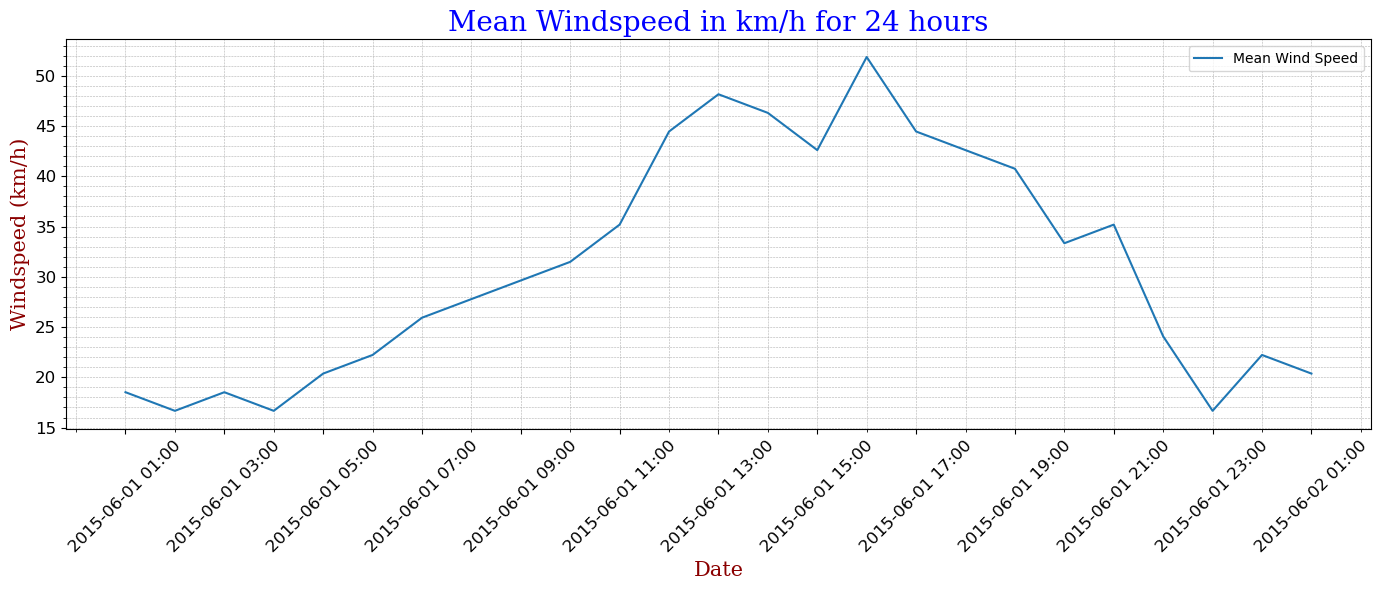

In [15]:
#How about the mean windspeed for a 24hour period

# Filter data for a specific period of time
startDate = "2015-06-01 01:00:00"
endDate = "2015-06-02 01:00:00"

twentyfourhourDf = df.loc[startDate:endDate]

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Plot with Seaborn
fig, ax = plt.subplots(figsize=(14, 6))

#Plot a seaborn lineplot of the data
sns.lineplot(data=twentyfourhourDf, x=twentyfourhourDf.index, y="Mean Wind Speed (km/h)")
#Add a title
plt.title('Mean Windspeed in km/h for 24 hours', fontdict=font1)
#Add labels
plt.xlabel('Date', fontdict=font2)
plt.ylabel('Windspeed (km/h)', fontdict=font2)
#Add a legend
plt.legend(['Mean Wind Speed'], loc='upper right')

#Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

#Set your major and minor locators for x-axis

ax.xaxis.set_major_locator(mdate.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_minor_locator(mdate.HourLocator())

#Add ticks to plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

# Add minor ticks on y-axis
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()

plt.show()



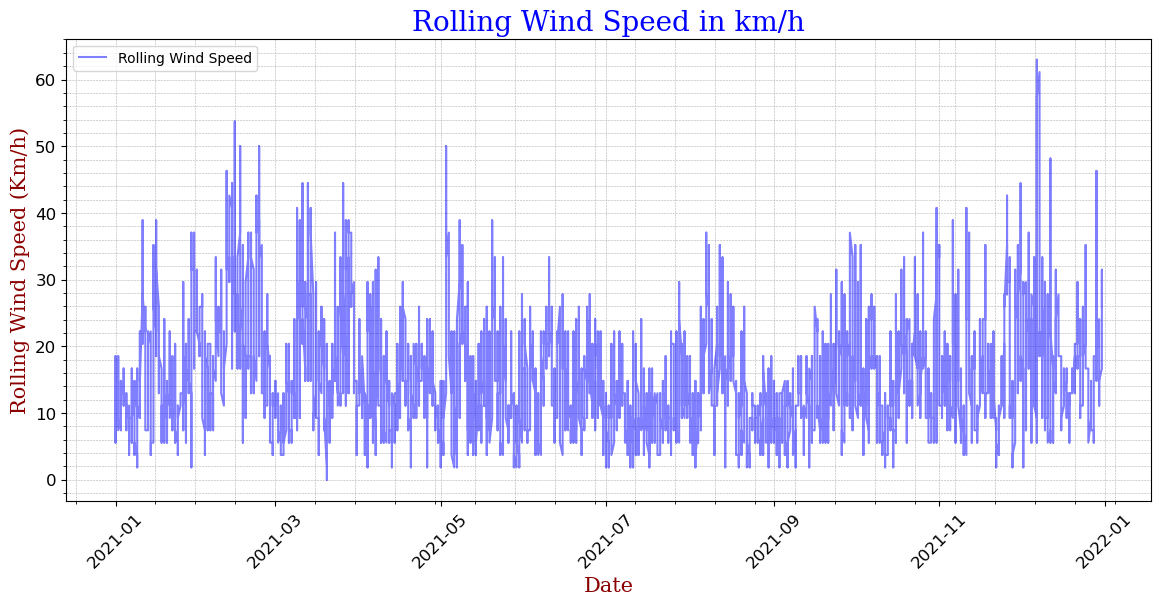

In [16]:
#The rolling windspeed over a 24 hour period for the year 2021
#We can calculate the rolling windspeed over a 24 hour period using the rolling method
#The rolling method calculates the rolling average over a specified window size
#We can specify the window size by using the window parameter

#Date filter to get data for the year 2021
date_from = '2021-01-01'
date_to = '2021-12-31'

#Calculate the rolling windspeed over a 24 hour period
df['Rolling Wind Speed (km/h)'] = df['Mean Wind Speed (km/h)'].rolling('h').mean()

#Plot the rolling windspeed data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Use date filter to filter the data for the year 2021
ax.plot(df.loc[date_from:date_to]['Date_only'], df.loc[date_from:date_to]['Rolling Wind Speed (km/h)'], color='blue', alpha=0.5)
#Add a title
ax.set_title('Rolling Wind Speed in km/h', fontdict = font1)
#Add x and y labels
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Rolling Wind Speed (Km/h)', fontdict = font2)
#Add a legend
plt.legend(['Rolling Wind Speed'], loc='upper left')
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
#Add ticks
plt.xticks(fontsize=12, rotation=45)

plt.yticks(fontsize=12)
ax.minorticks_on()




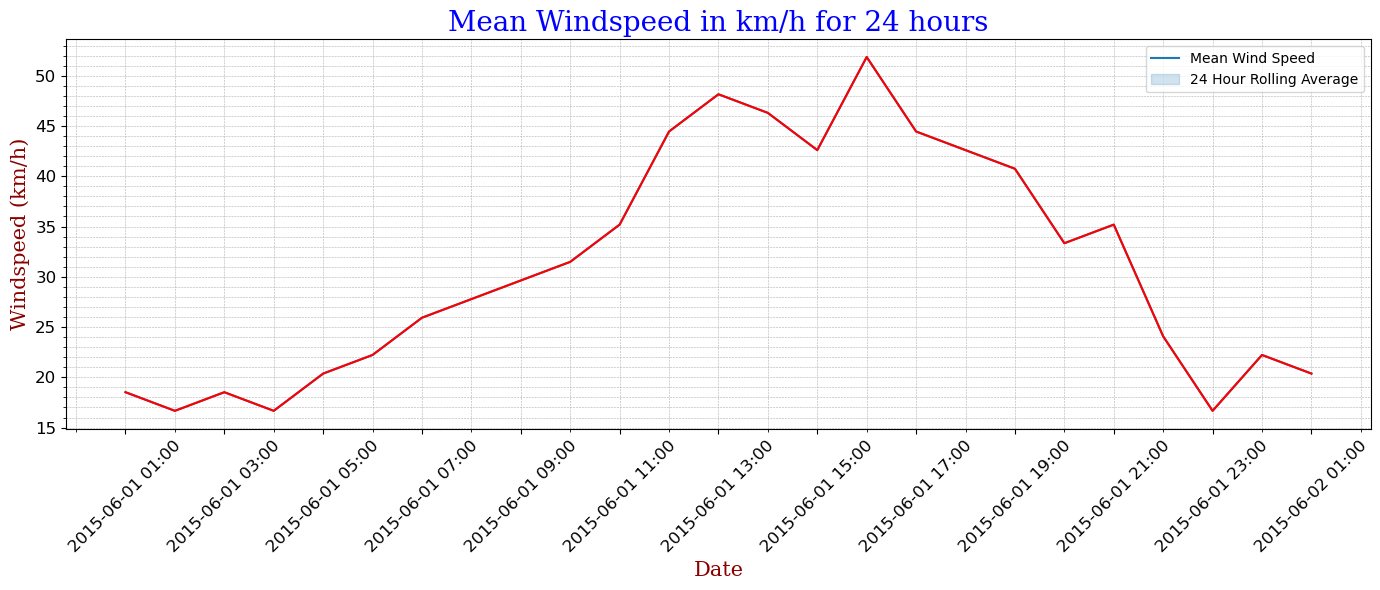

In [17]:
#how about the rolling windspeed on the one day graph

# Filter data for a specific period of time
startDate = "2015-06-01 01:00:00"
endDate = "2015-06-02 01:00:00"

onedayDf = df.loc[startDate:endDate]

#Calculate the rolling average of the windspeed data
rolling_average = onedayDf['Mean Wind Speed (km/h)'].rolling(window=1).mean()

#Set the colors for the pie chart.
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

# Plot with Seaborn
fig, ax = plt.subplots(figsize=(14, 6))

#Plot a seaborn lineplot of the data
sns.lineplot(data=onedayDf, x=onedayDf.index, y="Mean Wind Speed (km/h)")
sns.lineplot(data=rolling_average, color='red', label='24 Hour Rolling Average')

#Add a title
plt.title('Mean Windspeed in km/h for 24 hours', fontdict=font1)
#Add labels
plt.xlabel('Date', fontdict=font2)
plt.ylabel('Windspeed (km/h)', fontdict=font2)
#Add a legend

plt.legend(['Mean Wind Speed', '24 Hour Rolling Average'], loc='upper right')

#Add a grid
plt.grid(True, which='both', linestyle='--', linewidth=0.4)

#Set your major and minor locators for x-axis

ax.xaxis.set_major_locator(mdate.HourLocator(interval=2))
ax.xaxis.set_major_formatter(mdate.DateFormatter('%Y-%m-%d %H:%M'))
ax.xaxis.set_minor_locator(mdate.HourLocator())

#Add ticks to plot
plt.xticks(fontsize=12, rotation=45)

plt.yticks(fontsize=12)

# Add minor ticks on y-axis
ax.yaxis.set_minor_locator(AutoMinorLocator())

# Adjust layout to fit labels
plt.tight_layout()

plt.show()




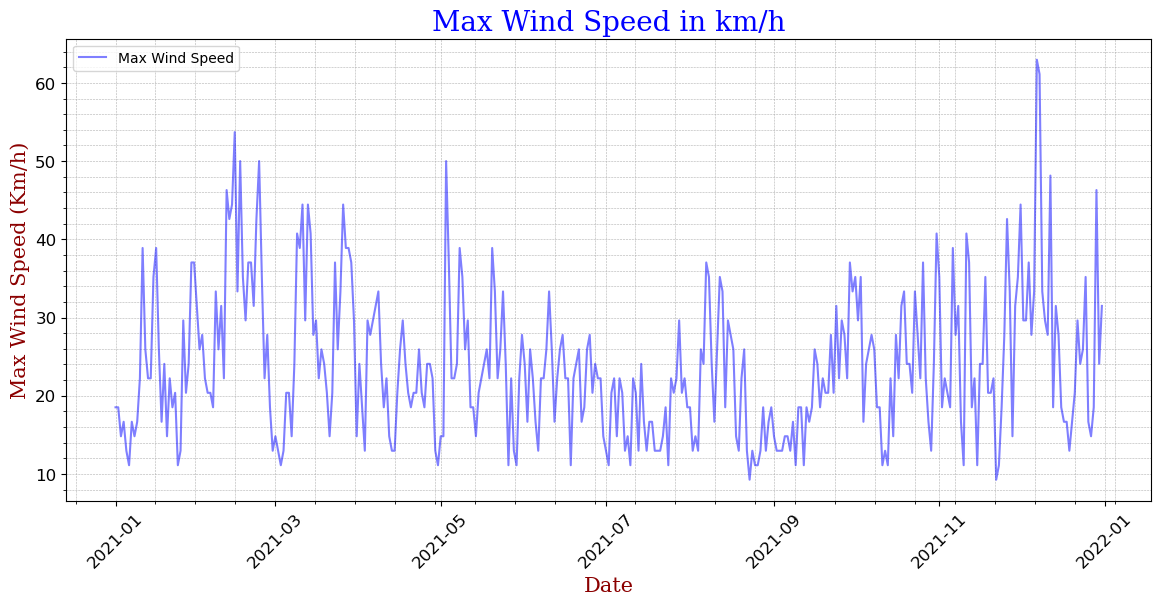

In [18]:

#Date filter to get data for the year 2021
date_from = '2021-01-01'
date_to = '2021-12-31'

# Calculate the daily max windspeed
DailyMax = df.loc[date_from:date_to]['Mean Wind Speed (km/h)'].resample('D').max()

#Plot the max windspeed data
fig, ax = plt.subplots(figsize=(14, 6))

#Set the colors for the pie chart
colors = ['blue', 'green', 'red']

#Set the font for the x and y axis labels and the title
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

#Use date filter to filter the data for the year 2021
ax.plot(DailyMax, color='blue', alpha=0.5)
#Add title
ax.set_title('Max Wind Speed in km/h', fontdict = font1)
#Add lables
ax.set_xlabel('Date', fontdict = font2)
ax.set_ylabel('Max Wind Speed (Km/h)', fontdict = font2)
#Add a legend
plt.legend(['Max Wind Speed'], loc='upper left')
#Add a grid
ax.grid(True, which='both', linestyle='--', linewidth=0.4)
#Add ticks to plot
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
ax.minorticks_on()




## References

https://www.javatpoint.com/how-to-skip-rows-while-reading-csv-file-using-pandas

### End